In [1]:
import ast
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
DIR = os.path.abspath(os.path.pardir)

In [6]:
def list_to_int(list):
    res = []
    for x in list:
        try:
            res.append(int(x))
        except:
            continue
    return res

def extract_info(numClientes):
    filename = DIR + '/TiemposRonda{}.csv'
    file = open(filename.format(numClientes),'r')
    
    file.readline()
    corridas = {}
    i = 1
    
    for line in file:
        corrida = line.split(',')
        corridas[str(i)] = list_to_int(corrida)
        i += 1
        
    return corridas

def get_average(_dict):
    avg = {}
    for key in _dict.keys():
        avg[key] = np.mean(_dict[key])
    return avg

def get_stdDev(_dict):
    stdDev = {}
    for key in _dict.keys():
        stdDev[key] = np.std(_dict[key])
    return stdDev

def process_info(numClientes):
    data = {}
    data['Datos'] = extract_info(numClientes)
    data['Promedios'] = get_average(data['Datos'])
    data['Desviacion'] = get_stdDev(data['Datos'])
    return data

def graph(title, filename, _dict, xlabel):
    path = os.path.join(DIR,'graphs')
    ticks = list(_dict.keys())
    data = list(_dict.values())
    n = len(_dict)
    
    bars = plt.bar(range(n), data, align = 'center', linewidth = 0)
    plt.xticks(range(n), ticks)
    
    plt.xlabel(xlabel)
    plt.ylabel('milisegundos')
    plt.title(title, pad = 20, fontsize = 14)
    
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    
    for bari in bars:
        height = bari.get_height()
        plt.gca().text(bari.get_x() + bari.get_width()/2, bari.get_height()-1, str(int(height)),
                     ha='center', color='white', fontsize=10)
        
    plt.savefig(path + '/' + filename, dpi = 300)
    plt.show()
    

In [23]:
def main():
    numClientes = [20,50]#,80,100,120]
    title = '{} de {} clientes en 10 corridas'
    xlabel = 'Número de corrida'
    
    total = {'Promedio':{}, 'Desviacion':{}}
    
    for n in numClientes:
        _dict = process_info(n)

        filename_avg = 'Avg' + str(n) + '.png'
        title_avg = title.format('Promedio', n)
        graph(title_avg, filename_avg, _dict['Promedios'], xlabel)

        filename_std = 'StdDev' + str(n) + '.png'
        title_std = title.format('Desviación Estándar', n)
        graph(title_std, filename_std, _dict['Desviacion'], xlabel)
        
        total['Promedio'][str(n)] = np.mean(list(_dict['Promedios'].values()))
        total['Desviacion'][str(n)] = np.std(list(_dict['Desviacion'].values()))
        
    graph('Promedios', 'Promedios.png', total['Promedio'], 'Número de clientes')
    graph('Desviacion Estándar', 'Desviacion.png', total['Desviacion'], 'Número de clientes')

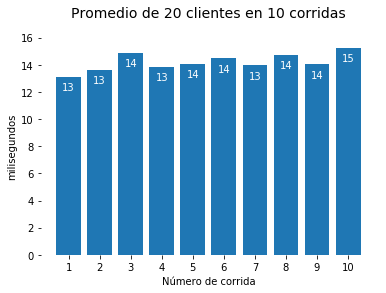

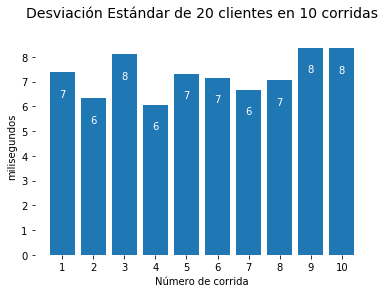

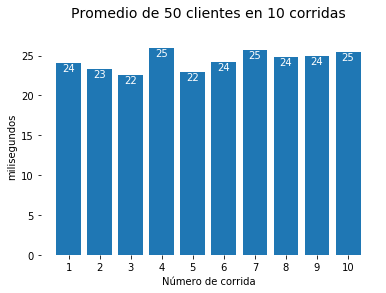

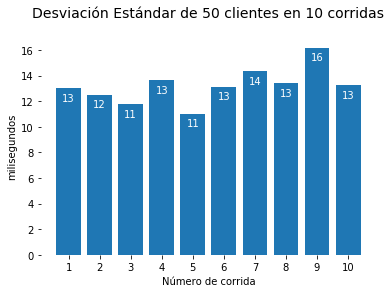

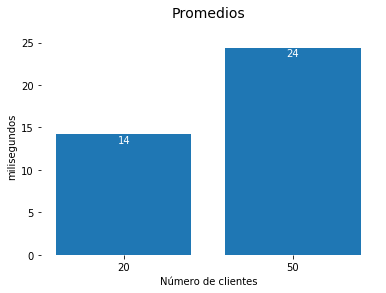

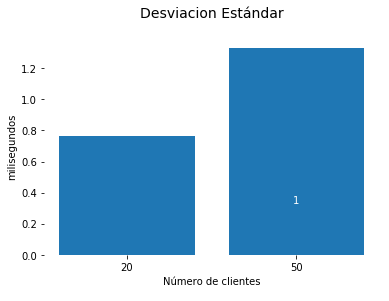

In [24]:
main()

In [9]:
d = process_info(20)

In [16]:
np.mean(list(d['Promedios'].values()))

14.20830697998293